In [75]:
import os
import pandas as pd
import matplotlib.pyplot as plt

activities_file_name = os.path.join("activities.csv")
activities_file_name

plt.style.use("classic")
plt.figure(figsize=(7.5, 4.25))

<Figure size 600x340 with 0 Axes>

<Figure size 600x340 with 0 Axes>

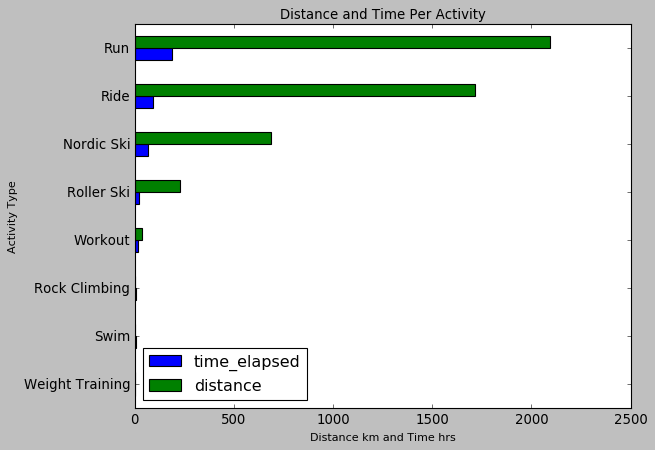

In [77]:
# Data cleanup
activities = pd.read_csv(activities_file_name, index_col=0)
activities.rename(columns={'Activity Type': 'activity_type', 'Elapsed Time': 'elapsed_time'}, inplace=True)
activities["Distance"] = pd.to_numeric(activities["Distance"], errors="coerce")

# Convert seconds to hours
activities["time_in_hours"] = activities['elapsed_time'].div(3600)

# Grouping data
grouped_activities = activities.groupby("activity_type")
totals = grouped_activities.sum()

# plotting a bar chart
# total_distances = totals.iloc[:,1]
# total_distances.sort_values(ascending=True).plot(kind="barh")
# plt.xlabel("Distance km", fontsize=10)
# plt.ylabel("Activity Type", fontsize=10)
# plt.title("Total Distance Per Activity", fontsize=12)


distances_and_times = pd.DataFrame({"time_elapsed": totals['time_in_hours'], "distance": totals['Distance']})
distances_and_times.sort_values(by=["distance", "time_elapsed"]).plot(kind="barh")
plt.title("Distance and Time Per Activity", fontsize=12)
plt.xlabel("Distance km and Time hrs", fontsize=10)
plt.ylabel("Activity Type", fontsize=10)

plt.savefig("Activity_analysis.png")
plt.show()